# Lecture 5 Assignment
## Bernardo Gutierrez

Using Newton-Raphson method to solve the following equations
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}

In [76]:
import matplotlib.pyplot as plt
import numpy as np

#First step is just to define my equations
def f1(x1,x2):
    return (x1*x1+x1*x2-10.)

def f2(x1,x2):
    return (x2+3*x1*x2*x2-57)

In [81]:
#next I want to create a central difference scheme for each dimenision of our system

def dericd1(y,x1,x2,dx): #this is the partial of f with respect to x1
    return (y(x1+dx/2,x2)-y(x1-dx/2,x2))/(dx)

def dericd2(y,x1,x2,dx): #this is the partial of f with respect to x2
    return (y(x1,x2+dx/2)-y(x1,x2-dx/2))/(dx)

In [92]:
# now i can define the the error in x1 and x2 explicitly

def dx1(f1,f2,x1,x2,dx):
    return (f2(x1,x2)*dericd2(f1,x1,x2,dx)-f1(x1,x2)*dericd2(f2,x1,x2,dx))/(dericd1(f1,x1,x2,dx)*dericd2(f2,x1,x2,dx)-dericd2(f1,x1,x2,dx)*dericd1(f2,x1,x2,dx))

def dx2(f1,f2,x1,x2,dx):
    return (f1(x1,x2)*dericd1(f2,x1,x2,dx)-f2(x1,x2)*dericd1(f1,x1,x2,dx))/(dericd1(f1,x1,x2,dx)*dericd2(f2,x1,x2,dx)-dericd2(f1,x1,x2,dx)*dericd1(f2,x1,x2,dx))
    

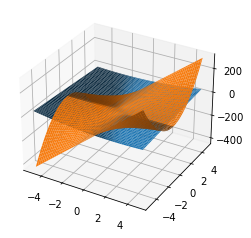

In [23]:
# I chose to make a 3D plot to make guessing easier but it's mostly unhelpful
x1=np.arange(-5,5,.1)
x2=np.arange(-5,5,.1)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1, x2 = np.meshgrid(x1, x1)

F1=f1(x1,x2)
F2=f2(x1,x2)

surf1 = ax.plot_surface(x1, x2, F1)
surf2 = ax.plot_surface(x1, x2, F2)


plt.show()

In [110]:
#now I define the initial parameters of and run until the error is below my chose threshold of 10^-8
x1=1
x2=1
dx=10**-6
n=100
eps = 1.e-8

for i in range(0,n):
    x1=x1+dx1(f1,f2,x1,x2,dx)
    x2=x2+dx2(f1,f2,x1,x2,dx)
    if abs(f1(x1,x2))<eps and abs(f2(x1,x2))<eps:
        print("The solution to the system was found at",(x1,x2)," after ",i," iteration with a precision of", (f1(x1,x2),f2(x1,x2)))
        break
return x1

The solution to the system was found at (2.0, 3.0000000000000004)  after  6  iteration with a precision of (0.0, 2.1316282072803006e-14)


SyntaxError: 'return' outside function (<ipython-input-110-f296e76522fd>, line 14)